In [14]:
import os
import pickle
import neurokit2 as nk
import sensors_import_support as sis
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np

In [15]:
# Import questionnaires and subjects data
with open('questionnaires.pkl', 'rb') as f:
    subject_data = pickle.load(f)

subject_data

,ID,Task,Number,STAI_Total,Fatigue,Stress,Mental_Demand,Physical_Demand,Frustration,NASA_Total,PSS,NARS_S1,NARS_S2,NARS_S3,Age,Sex,Experience
0,8.0,MANUAL,1,39.0,2.0,8.0,6.0,6.0,1.0,72,16,9,9,9,26.0,1,1.0
1,8.0,MANUAL,2,51.0,2.0,13.0,4.0,5.0,1.0,71,16,9,9,9,26.0,1,1.0
2,8.0,MANUAL,3,42.0,2.0,10.0,4.0,4.0,2.0,72,16,9,9,9,26.0,1,1.0
3,8.0,MANUAL,4,36.0,1.0,9.0,3.0,3.0,1.0,55,16,9,9,9,26.0,1,1.0
4,8.0,MANUAL,5,50.0,2.0,12.0,3.0,2.0,4.0,64,16,9,9,9,26.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,11.0,COBOT,14,41.0,2.0,12.0,3.0,4.0,3.0,46,14,10,17,10,37.0,1,2.0
199,11.0,COBOT,15,38.0,2.0,11.0,3.0,4.0,4.0,47,14,10,17,10,37.0,1,2.0
200,11.0,STROOP,1,31.0,1.0,10.0,4.0,1.0,1.0,36,14,10,17,10,37.0,1,2.0
202,11.0,STROOP,3,32.0,1.0,9.0,4.0,1.0,3.0,47,14,10,17,10,37.0,1,2.0


In [16]:
# Import signals
signals, fs = sis.import_opensignals('signals_example.txt')
signals[0:10]

,time,ECG,EMG,EDA
0,0.0,-0.00665,-0.04936,4.4125
1,1.0,-0.00773,-0.11435,4.3915
2,2.0,-0.00863,-0.11975,4.3976
3,3.0,-0.00809,-0.12148,4.4014
4,4.0,-0.00683,-0.16526,4.4090
5,5.0,-0.00782,-0.14805,4.3922
6,6.0,-0.00863,-0.05718,4.3995
7,7.0,-0.00907,0.01549,4.4075
8,8.0,-0.00988,0.03701,4.3915
9,9.0,-0.00858,0.05581,4.4052


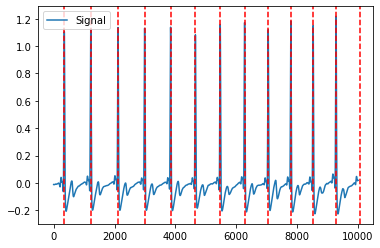

In [20]:
# Plot ecg with R peaks (only a subset, otherwise the plot becomes unreadable!)
ecg_processed, ecg_info = nk.ecg_process(signals['ECG'], sampling_rate=fs)
rpeaks = ecg_info["ECG_R_Peaks"]
cleaned_ecg = ecg_processed["ECG_Clean"]
plot = nk.events_plot(rpeaks[0:13], cleaned_ecg[0:10000])

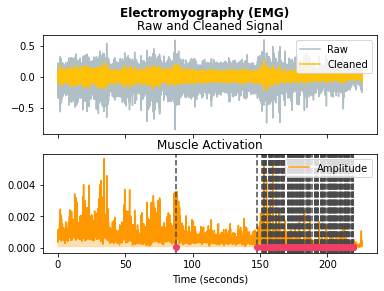

In [5]:
# Plot filtered emg
emg_processed, _ = nk.emg_process(signals['EMG'], sampling_rate=fs)
plot = nk.emg_plot(emg_processed, fs)y

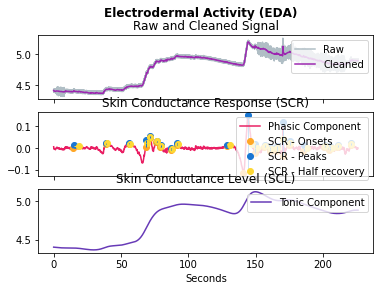

In [19]:
# Plot filtered eda
eda_processed, features = nk.eda_process(signals['EDA'], sampling_rate=fs, method="neurokit")
plot = nk.eda_plot(eda_processed, fs)

In [23]:
# Extraction of features

fs = 1000
window = 30
experiment_type = 'manual'
load_path = os.path.join(os.getcwd(), 'experiments', experiment_type)

In [19]:
# ECG 
# do not run it since there is the csv loaded after
dataframe_ECG = sis.extract_plux_data_windowed(load_path, 0, window, 'ECG')
np.save("dataframe_ECG.npy", dataframe_ECG)

100%|██████████| 141/141 [04:04<00:00,  1.73s/it]


In [22]:
# dataframe_ECG = np.load("dataframe_ECG.npy")
# cg_time_and_freq_features = sis.extract_time_and_freq_hrv_features(dataframe_ECG, fs)

In [7]:
# EDA
# have to fix this and make it a pd.DataFrame()
# dataframe_EDA = sis.extract_plux_data_windowed(load_path, 0, window, 'EDA')
# np.save("dataframe_EDA.npy", dataframe_EDA)

In [8]:
# dataframe_EDA = np.load("dataframe_EDA.npy")
# eda_time_and_freq_features = sis.extract_eda_time_and_frequency_features(dataframe_EDA, fs, window)

In [25]:
# EMG
# do not run is since there is the csv loaded after
# dataframe_EMG = sis.extract_plux_data_windowed(load_path, 0, window, 'EMG')
# np.save("dataframe_EMG.npy", dataframe_EMG)

In [26]:
# dataframe_EMG = np.load("dataframe_EMG.npy")
# emg_time_and_freq_features = sis.extract_emg_featues(dataframe_EMG, fs)

In [9]:
# ecg_time_and_freq_features.to_csv(Path("saved_data", f"ecg_time_and_freq_features_{experiment_type}.csv"), index=False)
# emg_time_and_freq_features.to_csv(Path("saved_data", f"emg_time_and_freq_features_{experiment_type}.csv"), index=False)
# eda_time_and_freq_features.to_csv(Path("saved_data", f"eda_time_and_freq_features_{experiment_type}.csv"), index=False)

In [24]:
ecg_time_and_freq_features = pd.read_csv(Path("saved_data", f"ecg_time_and_freq_features_{experiment_type}.csv"))
eda_time_and_freq_features = pd.read_csv(Path("saved_data", f"eda_time_and_freq_features_{experiment_type}.csv"))
emg_time_and_freq_features = pd.read_csv(Path("saved_data", f"emg_time_and_freq_features_{experiment_type}.csv"))

In [12]:
ecg_time_and_freq_features.head()

,HR_Mean,QRS_Mean,QR_Mean,RS_Mean,PR_Mean,TR_Mean,PP_Mean,QQ_Mean,SS_Mean,TT_Mean,...,VLF_Peak,VLF_Rel,LF_Peak,LF_Rel,HF_Peak,HF_Rel,LF_Norm,HF_Norm,fft_ratio,fft_total
0,82.261883,0.054415,0.017390,0.054415,0.149122,0.083244,0.729650,0.729675,0.729575,0.729575,...,0.039062,9.667934,0.149414,27.100074,0.399414,63.231991,30.000504,69.999496,0.428582,17.633456
1,81.587175,0.054350,0.017575,0.054350,0.148775,0.082975,0.734590,0.734564,0.734538,0.734513,...,0.039062,9.658546,0.149414,27.078766,0.399414,63.262688,29.973799,70.026201,0.428037,17.886191
2,83.483549,0.054317,0.018585,0.054317,0.149707,0.083366,0.718500,0.718400,0.718425,0.718525,...,0.039062,9.672528,0.149414,27.110498,0.399414,63.216974,30.013569,69.986431,0.428848,16.976256
3,84.808715,0.056190,0.020190,0.056190,0.146310,0.083098,0.707585,0.707634,0.707659,0.707450,...,0.039062,9.671879,0.149414,27.109027,0.399414,63.219094,30.011725,69.988275,0.428811,16.920400
4,84.856000,0.054190,0.018214,0.054190,0.146929,0.083238,0.707220,0.707122,0.707122,0.707049,...,0.039062,9.660283,0.149414,27.082708,0.399414,63.257009,29.978739,70.021261,0.428138,17.078919


In [32]:
for name in eda_time_and_freq_features.columns:
    print(name)

meanEda
stdEda
kurtEda
skewEda
meanDerivative
meanNegativeDerivative
activity
mobility
complexity
peaksCount
meanPeakAmplitude
meanRiseTime
sumPeakAmplitude
sumRiseTime
sma
energy
varSpectralPower
totalEnergyWavelet
energyWavelet_0
energyWavelet_1
energyWavelet_2
energyWavelet_3
distributionEnergy_0
distributionEnergy_1
distributionEnergy_2
distributionEnergy_3
entropyWavelet_0
entropyWavelet_1
entropyWavelet_2
entropyWavelet_3
meanMFCCS_0
meanMFCCS_1
meanMFCCS_2
meanMFCCS_3
meanMFCCS_4
meanMFCCS_5
meanMFCCS_6
meanMFCCS_7
meanMFCCS_8
meanMFCCS_9
meanMFCCS_10
meanMFCCS_11
meanMFCCS_12
meanMFCCS_13
meanMFCCS_14
meanMFCCS_15
meanMFCCS_16
meanMFCCS_17
meanMFCCS_18
meanMFCCS_19
stdMFCCS_0
stdMFCCS_1
stdMFCCS_2
stdMFCCS_3
stdMFCCS_4
stdMFCCS_5
stdMFCCS_6
stdMFCCS_7
stdMFCCS_8
stdMFCCS_9
stdMFCCS_10
stdMFCCS_11
stdMFCCS_12
stdMFCCS_13
stdMFCCS_14
stdMFCCS_15
stdMFCCS_16
stdMFCCS_17
stdMFCCS_18
stdMFCCS_19
medianMFCCS_0
medianMFCCS_1
medianMFCCS_2
medianMFCCS_3
medianMFCCS_4
medianMFCCS_5
medi

In [14]:
emg_time_and_freq_features.head()

,rmse,mav,var,energy,mnf,mdf,zc,fr,mav_arr_0,mav_arr_1,mav_arr_2,mav_arr_3,std_0,std_1,std_2,std_3
0,0.304890,0.222837,0.092961,2788.740623,208.785230,416.533333,10231.0,1.504045,0.069765,0.380298,0.306258,0.128382,0.117332,0.628083,0.520388,0.215963
1,0.570366,0.399544,0.325328,9759.527398,199.250204,425.733333,9528.0,1.550531,0.128292,0.719603,0.546872,0.203285,0.221090,1.250246,0.952329,0.349607
2,0.544145,0.384373,0.296103,8882.801943,200.632599,424.566667,9563.0,1.568278,0.118951,0.697846,0.522614,0.199021,0.200666,1.189462,0.908379,0.343143
3,0.449268,0.313461,0.201849,6055.256819,202.903838,422.233333,9860.0,1.552717,0.101940,0.565157,0.426133,0.166713,0.173412,0.974912,0.746332,0.289914
4,0.411453,0.308273,0.169299,5078.803052,205.380345,420.766667,9621.0,1.548039,0.095436,0.534051,0.427821,0.164808,0.153871,0.871863,0.713777,0.278076
